# BayesC
## Rohan L. Fernando and Hao Cheng
## February 2016

# Simulating Genotypes and Phenotypes

In [1]:
using(Distributions)
using XSim
srand(31415)
chrLength = 1.0
numChr    = 1
numLoci   = 2000
mutRate   = 0.0
locusInt  = chrLength/numLoci
mapPos    = collect(0:locusInt:(chrLength-0.0001))
geneFreq  = fill(0.5,numLoci)
XSim.init(numChr,numLoci,chrLength,geneFreq,mapPos,mutRate) 

In [27]:
popSizeFounder = 500
sires = sampleFounders(popSizeFounder)
dams  = sampleFounders(popSizeFounder)
nothing

ngen,popSize = 20,500
sires1,dams1,gen1 = sampleRan(popSize, ngen, sires, dams);
animals = concatCohorts(sires1,dams1);

Sampling 500 animals into base population.
Sampling 500 animals into base population.
Generation     2: sampling   250 males and   250 females
Generation     3: sampling   250 males and   250 females
Generation     4: sampling   250 males and   250 females
Generation     5: sampling   250 males and   250 females
Generation     6: sampling   250 males and   250 females
Generation     7: sampling   250 males and   250 females
Generation     8: sampling   250 males and   250 females
Generation     9: sampling   250 males and   250 females
Generation    10: sampling   250 males and   250 females
Generation    11: sampling   250 males and   250 females
Generation    12: sampling   250 males and   250 females
Generation    13: sampling   250 males and   250 females
Generation    14: sampling   250 males and   250 females
Generation    15: sampling   250 males and   250 females
Generation    16: sampling   250 males and   250 females
Generation    17: sampling   250 males and   250 females
Ge

In [3]:
M = getOurGenotypes(animals)
k      = size(M,2)
nQTL   = 5
QTLPos = sample(1:k,nQTL,replace=false)
mrkPos = deleteat!(collect(1:k),sort(QTLPos))

Q = M[:,QTLPos]
X = M[:,mrkPos]
nQTL = size(Q,2)
nObs = size(Q,1)
nMarkers = size(X,2)
α = rand(Normal(0,1),nQTL)
a = Q*α
# scaling breeding values to have variance 25.0
v = var(a)
genVar = 25.0
a *= sqrt(genVar/v)
genVar = var(a)
# formatted printing
@printf "genetic variance    = %8.2f  \n" genVar
resVar = 75.0
resStd = sqrt(resVar)
e = rand(Normal(0,resStd),nObs)
y = 100 + a + e
@printf "phenotypic mean     = %8.2f  \n" Base.mean(y)
@printf "phenotypic variance = %8.2f  \n" var(y)

genetic variance    =    25.00  
phenotypic mean     =    97.84  
phenotypic variance =   100.11  


In [4]:
meanXCols = mean(X,1)
p = meanXCols/2
mean2pq = mean(2p.*(1-p))

0.48940920401002513

# run JWAS

In [27]:
#Pkg.rm("JWAS")
#Pkg.clone("https://github.com/reworkhow/JWAS.jl.git")

In [37]:
using JWAS
myOption=Dict()
myOption["run"]           = "BayesC"
myOption["seed"]          = 314
myOption["chainLength"]   = 2000
myOption["probFixed"]     = 0.05
myOption["estimatePi"]    = "no"
myOption["estimateScale"] = "no"
myOption["varGenotypic"]  = 25
myOption["varResidual"]   = 75
myOption["windowSize"]    = 200
X=float(X);
output = runJWAS(myOption,X,y)
keys(output)
markerEffect=output["posterior mean of marker effects"];

This is iteration 100, number of loci 1855, vara 19.697248008073053, vare 86.93375366629206
This is iteration 200, number of loci 1853, vara 27.079325133465233, vare 67.38315877728023
This is iteration 300, number of loci 1827, vara 27.039992702381277, vare 76.50832623724827
This is iteration 400, number of loci 1866, vara 19.187710109738234, vare 77.1292515986312
This is iteration 500

LoadError: LoadError: InterruptException:
while loading In[37], in expression starting on line 13

In [29]:
keys(output)

Base.KeyIterator for a Dict{Any,Any} with 8 entries. Keys:
  "Proportion of variance explained by genomic window"
  "posterior sample of genotypic variance"
  "posterior mean of fixed effects"
  "posterior mean of marker effects"
  "posterior sample of pi"
  "posterior sample of residual variance"
  "posterior sample of scale"
  "model frequency"

In [30]:
winVarProps  = output["Proportion of variance explained by genomic window"]
nWins        = size(winVarProps,2)
posProbAssoc = mean(winVarProps .>1/nWins,1)

1x10 Array{Float64,2}:
 0.221  0.142  0.245  0.407  0.2035  0.274  0.7275  0.918  0.6175  0.208

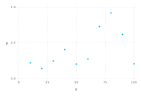

In [31]:
using Gadfly
plot(x=(1:nWins)*10,y=posProbAssoc)

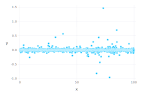

In [32]:
plot(x=(1:size(markerEffect,1))*100/2000,y=markerEffect)

In [33]:
sortrows([QTLPos/2000*100 α],by=x->(x[1]))

, number of loci 86, vara 20.955011069794036, vare 72.0442560274534


5x2 Array{Float64,2}:
 23.25  -0.148607 
 61.1   -0.598463 
 72.15  -0.941906 
 74.75   0.0892984
 77.65   1.61007  

### New Data

In [28]:
k      = size(M,2)
nQTL   = 50
QTLPos = sample(1:k,nQTL,replace=false)
mrkPos = deleteat!(collect(1:k),sort(QTLPos))
Q = M[:,QTLPos]
X = M[:,mrkPos]
nQTL = size(Q,2)
nObs = size(Q,1)
nMarkers = size(X,2)
α = rand(Normal(0,1),nQTL)
a = Q*α
# scaling breeding values to have variance 25.0
v = var(a)
genVar = 25.0
a *= sqrt(genVar/v)
genVar = var(a)
# formatted printing
@printf "genetic variance    = %8.2f  \n" genVar
resVar = 75.0
resStd = sqrt(resVar)
e = rand(Normal(0,resStd),nObs)
y = 100 + a + e
@printf "phenotypic mean     = %8.2f  \n" Base.mean(y)
@printf "phenotypic variance = %8.2f  \n" var(y)

genetic variance    =    25.00  
phenotypic mean     =   110.62  
phenotypic variance =    98.36  


In [29]:
WGDataMatrix = [y X]

500x1951 Array{Float64,2}:
 109.718   1.0  1.0  0.0  1.0  1.0  1.0  …  1.0  1.0  1.0  2.0  2.0  1.0  1.0
 108.231   0.0  2.0  1.0  1.0  1.0  0.0     1.0  1.0  1.0  2.0  0.0  2.0  0.0
 115.253   1.0  1.0  2.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 111.902   0.0  1.0  2.0  0.0  1.0  1.0     0.0  1.0  1.0  1.0  1.0  0.0  1.0
 108.151   2.0  1.0  0.0  1.0  1.0  1.0     1.0  1.0  2.0  1.0  2.0  1.0  0.0
 110.135   0.0  1.0  1.0  1.0  1.0  2.0  …  0.0  2.0  0.0  0.0  0.0  0.0  2.0
 120.976   0.0  1.0  1.0  1.0  1.0  2.0     1.0  2.0  0.0  1.0  0.0  1.0  1.0
 117.736   1.0  1.0  1.0  0.0  1.0  1.0     1.0  1.0  2.0  1.0  1.0  1.0  2.0
 113.951   1.0  0.0  1.0  2.0  1.0  1.0     1.0  2.0  1.0  2.0  1.0  0.0  1.0
 132.162   1.0  2.0  2.0  2.0  2.0  1.0     1.0  1.0  1.0  2.0  1.0  1.0  1.0
 108.243   0.0  1.0  1.0  1.0  0.0  0.0  …  2.0  2.0  0.0  1.0  0.0  1.0  1.0
 114.734   0.0  2.0  2.0  0.0  1.0  0.0     1.0  0.0  0.0  1.0  1.0  0.0  0.0
 102.409   1.0  1.0  1.0  1.0  1.0  0

### Writing data into a file

In [30]:
writedlm("WGDataFile",WGDataMatrix," ")

In [31]:
; awk 'NR<10 {printf("%10.3f %3d %3d %3d\n", $1,$2,$3, $4) }' WGDataFile

   109.718   1   1   0
   108.231   0   2   1
   115.253   1   1   2
   111.902   0   1   2
   108.151   2   1   0
   110.135   0   1   1
   120.976   0   1   1
   117.736   1   1   1
   113.951   1   0   1


### Reading data from  a file

In [32]:
myDataMatrix = readdlm("WGDataFile", ' ')

500x1951 Array{Float64,2}:
 109.718   1.0  1.0  0.0  1.0  1.0  1.0  …  1.0  1.0  1.0  2.0  2.0  1.0  1.0
 108.231   0.0  2.0  1.0  1.0  1.0  0.0     1.0  1.0  1.0  2.0  0.0  2.0  0.0
 115.253   1.0  1.0  2.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 111.902   0.0  1.0  2.0  0.0  1.0  1.0     0.0  1.0  1.0  1.0  1.0  0.0  1.0
 108.151   2.0  1.0  0.0  1.0  1.0  1.0     1.0  1.0  2.0  1.0  2.0  1.0  0.0
 110.135   0.0  1.0  1.0  1.0  1.0  2.0  …  0.0  2.0  0.0  0.0  0.0  0.0  2.0
 120.976   0.0  1.0  1.0  1.0  1.0  2.0     1.0  2.0  0.0  1.0  0.0  1.0  1.0
 117.736   1.0  1.0  1.0  0.0  1.0  1.0     1.0  1.0  2.0  1.0  1.0  1.0  2.0
 113.951   1.0  0.0  1.0  2.0  1.0  1.0     1.0  2.0  1.0  2.0  1.0  0.0  1.0
 132.162   1.0  2.0  2.0  2.0  2.0  1.0     1.0  1.0  1.0  2.0  1.0  1.0  1.0
 108.243   0.0  1.0  1.0  1.0  0.0  0.0  …  2.0  2.0  0.0  1.0  0.0  1.0  1.0
 114.734   0.0  2.0  2.0  0.0  1.0  0.0     1.0  0.0  0.0  1.0  1.0  0.0  0.0
 102.409   1.0  1.0  1.0  1.0  1.0  0

In [33]:
yNew = myDataMatrix[:,1]
XNew = myDataMatrix[:,2:end];

### JWAS with new data

In [38]:
output = runJWAS(myOption,XNew,yNew);

This is iteration 100, number of loci 1855, vara 19.697248008073053, vare 86.93375366629206
This is iteration 200, number of loci 1853, vara 27.079325133465233, vare 67.38315877728023
This is iteration 300, number of loci 1827, vara 27.039992702381277, vare 76.50832623724827
This is iteration 400, number of loci 1866, vara 19.187710109738234, vare 77.1292515986312
This is iteration 500, number of loci 1845, vara 18.714188204611826, vare 85.39753495106247
This is iteration 600, number of loci 1849, vara 19.670582825315563, vare 70.94279387039958
This is iteration 700, number of loci 1870, vara 13.468815633784915, vare 86.07602486487552
This is iteration 800, number of loci 1858, vara 14.601468339560942, vare 75.15096582802725
This is iteration 900, number of loci 1859, vara 15.233817097954685, vare 79.86357950796364
This is iteration 1000, number of loci 1850, vara 21.591322843277656, vare 75.45486529172427
This is iteration 1100, number of loci 1856, vara 22.35871382304497, vare 65.089

In [14]:
keys(output)

Base.KeyIterator for a Dict{Any,Any} with 8 entries. Keys:
  "Proportion of variance explained by genomic window"
  "posterior sample of genotypic variance"
  "posterior mean of fixed effects"
  "posterior mean of marker effects"
  "posterior sample of pi"
  "posterior sample of residual variance"
  "posterior sample of scale"
  "model frequency"

In [39]:
genVarSamples = output["posterior sample of genotypic variance"]

2000-element Array{Float64,1}:
 27.6435
 26.7103
 25.33  
 21.2513
 23.7187
 28.2565
 26.8131
 20.4429
 25.6497
 23.36  
 26.6621
 26.3007
 26.3518
  ⋮     
 18.1069
 17.5109
 17.5115
 21.2811
 18.0123
 18.5073
 18.0344
 22.576 
 20.9864
 18.3284
 19.964 
 18.8081

In [40]:
mean(genVarSamples)

21.86911248882994

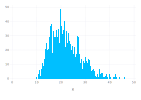

In [42]:
using Gadfly
plot(x=genVarSamples,Geom.histogram)